In [15]:
# Este colab forma parte del video de Redes Neuronales Convolucionales del canal de Youtube "Ringa Tech"
# https://youtu.be/eGDSlW93Bng

import tensorflow as tf
import tensorflow_datasets as tfds

#Descargar set de datos de MNIST (Numeros escritos a mano, etiquetados)
datos, metadatos = tfds.load('mnist', as_supervised=True, with_info=True)

#Obtener en variables separadas los datos de entrenamiento (60k) y pruebas (10k)
datos_entrenamiento, datos_pruebas = datos['train'], datos['test']

#Funcion de normalizacion para los datos (Pasar valor de los pixeles de 0-255 a 0-1)
#(Hace que la red aprenda mejor y mas rapido)
def normalizar(imagenes, etiquetas):
  imagenes = tf.cast(imagenes, tf.float32)
  imagenes /= 255 #Aqui se pasa de 0-255 a 0-1
  return imagenes, etiquetas

#Normalizar los datos de entrenamiento con la funcion que hicimos
datos_entrenamiento = datos_entrenamiento.map(normalizar)
datos_pruebas = datos_pruebas.map(normalizar)

#Agregar a cache (usar memoria en lugar de disco, entrenamiento mas rapido)
datos_entrenamiento = datos_entrenamiento.cache()
datos_pruebas = datos_pruebas.cache()

clases = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

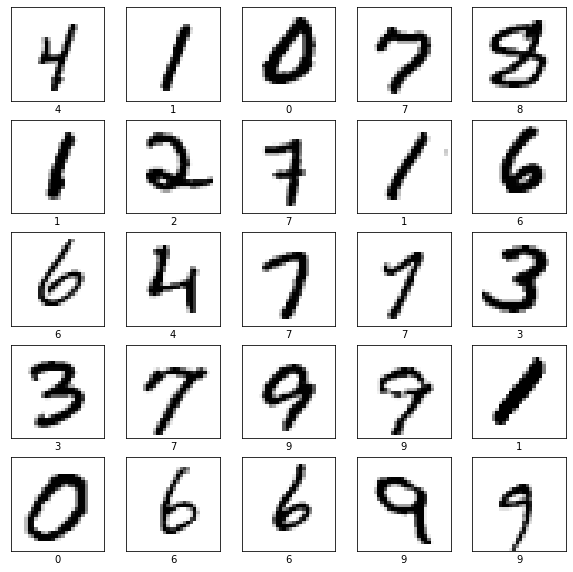

In [16]:
#Codigo para mostrar imagenes del set, no es necesario ejecutarlo, solo imprime unos numeros :)
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))

for i, (imagen, etiqueta) in enumerate(datos_entrenamiento.take(25)):
  imagen = imagen.numpy().reshape((28,28))
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(imagen, cmap=plt.cm.binary)
  plt.xlabel(clases[etiqueta])

plt.show()  

In [17]:
#Crear el modelo (Ya utiliza capas de convolución y agrupación)
#Cuenta con 1 capa de convolución con 32 núcleos y otra con 64. 2 capas de agrupación.
#Finalmente una capa densa con 100 neuronas

modelo = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), input_shape=(28, 28, 1), activation='relu'), 
    tf.keras.layers.MaxPooling2D(2,2), # 2,2 es el tamaño de la matriz de agrupacion

    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'), 
    tf.keras.layers.MaxPooling2D(2,2), # 2,2 es el tamaño de la matriz de agrupacion

    tf.keras.layers.Flatten(), 
    tf.keras.layers.Dense(units=100, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

# Compilar modelo
modelo.compile(
    optimizer = 'adam', 
    loss = tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=['accuracy']
)

In [18]:
#Los numeros de datos de entrenamiento y pruebas (60k y 10k)
num_datos_entrenamiento = metadatos.splits["train"].num_examples
num_datos_pruebas = metadatos.splits["test"].num_examples

#Trabajar por lotes
TAMANO_LOTE=32

#Shuffle y repeat hacen que los datos esten mezclados de manera aleatoria
#para que el entrenamiento no se aprenda las cosas en orden
datos_entrenamiento = datos_entrenamiento.repeat().shuffle(num_datos_entrenamiento).batch(TAMANO_LOTE)
datos_pruebas = datos_pruebas.batch(TAMANO_LOTE)

In [19]:
#Realizar el entrenamiento
import math

historial = modelo.fit(
    datos_entrenamiento,
    epochs=60,
    steps_per_epoch=math.ceil(num_datos_entrenamiento/TAMANO_LOTE)
)

Epoch 1/60
1875/1875 [==============================] - 28s 14ms/step - loss: 0.1304 - accuracy: 0.9600
Epoch 2/60
1875/1875 [==============================] - 25s 13ms/step - loss: 0.0452 - accuracy: 0.9862
Epoch 3/60
1875/1875 [==============================] - 27s 14ms/step - loss: 0.0281 - accuracy: 0.9912
Epoch 4/60
1875/1875 [==============================] - 26s 14ms/step - loss: 0.0223 - accuracy: 0.9926
Epoch 5/60
1875/1875 [==============================] - 26s 14ms/step - loss: 0.0161 - accuracy: 0.9951
Epoch 6/60
1875/1875 [==============================] - 27s 14ms/step - loss: 0.0134 - accuracy: 0.9957
Epoch 7/60
1875/1875 [==============================] - 33s 18ms/step - loss: 0.0112 - accuracy: 0.9964
Epoch 8/60
1875/1875 [==============================] - 28s 15ms/step - loss: 0.0086 - accuracy: 0.9971
Epoch 9/60
1875/1875 [==============================] - 27s 14ms/step - loss: 0.0071 - accuracy: 0.9977
Epoch 10/60
1875/1875 [==============================] - 27s 14m

In [20]:
#Exportar el modelo al explorador! (Mas detalle de esto en en mi video de exportacion: https://youtu.be/JpE4bYyRADI )
modelo.save('numeros_conv.h5')

#Convertirlo a tensorflow.js
!mkdir carpeta_salida_2

!"C:\Users\fabian\AppData\Roaming\Python\Python310\Scripts\tensorflowjs_converter" --input_format keras numeros_conv.h5 carpeta_salida_2

2022-04-14 14:58:16.285637: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'cudart64_110.dll'; dlerror: cudart64_110.dll not found
2022-04-14 14:58:16.285975: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
